<a href="https://colab.research.google.com/github/diosamuel/road-crack-detection/blob/main/GLCM_FEATURE_EXTRACTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Downloader via Roboflow

download image that has been bounded box help by roboflow

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [13]:
!rm -r /content/RoadCrack-2

In [14]:
import os
import json
from roboflow import Roboflow
rf = Roboflow(api_key="4V6T95yomp7w4ccYHkYr")
project = rf.workspace("foreveyrone").project("roadcrack-4xqqm")
version = project.version(2)
dataset = version.download("voc")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RoadCrack-2 in voc:: 100%|██████████| 138/138 [00:00<00:00, 569.90it/s]


In [39]:
!pip install opencv-python

In [91]:
!pip install pillow

# Cut Image based on bounding box

In [103]:
import xml.etree.ElementTree as ET
from PIL import Image
# tree = ET.parse('data.xml')
# root = tree.getroot()

dir = os.listdir("/content/RoadCrack-2/train")
for i in dir:
  if ".xml" in i:
    with open(f"/content/RoadCrack-2/train/{i}") as f:
      content = f.read().strip()
      value = ET.fromstring(content)
      if not value.find(".//bndbox/xmin") is None:
        paths = f"/content/RoadCrack-2/train/{value.find('path').text}"
        xmin = int(value.find(".//bndbox/xmin").text)
        xmax = int(value.find(".//bndbox/xmax").text)
        ymin = int(value.find(".//bndbox/ymin").text)
        ymax = int(value.find(".//bndbox/ymax").text)
        img = Image.open(paths)
        cropped_img = img.crop((xmin, ymin, xmax, ymax)).resize((64*4, 64*4))
        cropped_img.save(f"/content/cropped/cropped_{value.find('path').text}")
        # if cropped_img:
          # cv2.imwrite(f"/content/cropped/cropped_{paths}", cropped_img)


In [104]:
!ls /content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg

/content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg


In [191]:
example = "/content/cropped/cropped_IMG_20251106_151824_jpg.rf.7ef18d6929a21e4c6a7ef7d52ef9a3d0.jpg"

# GLCM Features

Contrast, Dissimilarity, Homogeneity, Energy and Correlation

In [178]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import data, io, feature, util, transform
from matplotlib import pyplot as plt

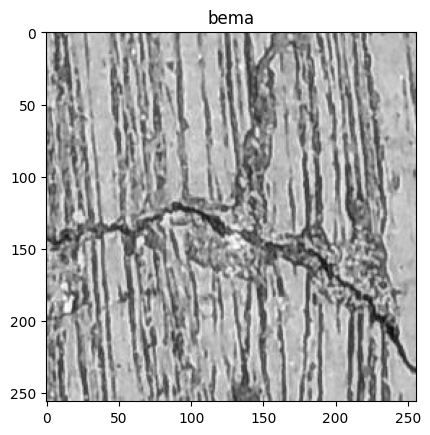

In [192]:
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'bema')
plt.show()

array([[190, 190, 193, ..., 197, 190, 184],
       [194, 191, 190, ..., 195, 189, 180],
       [198, 193, 189, ..., 195, 194, 182],
       ...,
       [152, 138, 126, ..., 200, 199, 199],
       [151, 152, 150, ..., 201, 199, 199],
       [154, 169, 184, ..., 200, 199, 199]], dtype=uint8)
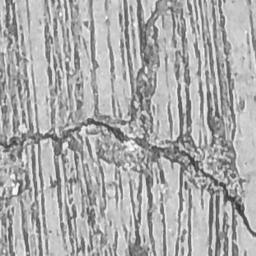

In [193]:
imaged

In [194]:
distances = [50]
angles = [np.pi/2]
glcm = graycomatrix(image,distances=distances,angles=angles,levels=255)

In [195]:
contrast = graycoprops(glcm,'contrast')

In [196]:
dissimilarity = graycoprops(glcm,'dissimilarity')
homogeneity = graycoprops(glcm,'homogeneity')
energy = graycoprops(glcm,'energy')
correlation = graycoprops(glcm,'correlation')

Contrast: Measures the local variations in the image. High contrast values indicate large differences between neighboring pixel intensities.

Dissimilarity: Measures the average difference in intensity between neighboring pixels. High dissimilarity values indicate greater heterogeneity in texture.

Homogeneity: Reflects the closeness of the distribution of elements in the GLCM to the GLCM diagonal. High homogeneity values indicate that elements are concentrated along the diagonal, suggesting a more uniform texture.

Energy (or Angular Second Moment): Represents the orderliness or homogeneity of the image. High energy values indicate more uniform texture.

Correlation: Measures the linear dependency between pixel pairs. High correlation values indicate a more predictable texture.

In [197]:
contrast,dissimilarity,homogeneity,energy,correlation

(array([[2785.15141459]]),
 array([[41.61929232]]),
 array([[0.02859241]]),
 array([[0.00970566]]),
 array([[0.03240767]]))